# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [2]:
#!pip install tensorflow_datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_adroit_hammer', 'd4rl_adroit_pen', 'd4rl_adroit_relocate', 'd4rl_mujoco_ant', 'd4rl_mujoco_halfcheetah', 'd4rl_mujoco_hopper', 'd4rl_mujoco_walk

In [3]:
data, info = tfds.load('mnist', with_info = True)   # with_info = True : mnist의 상세한 정보를 같이 불러오기
train_data, test_data = data['train'], data['test']

In [4]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\LEE\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [5]:
import numpy as np

In [6]:
num_items = 20
num_list = np.arange(num_items)

In [7]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [8]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [9]:
for item in num_list_dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [10]:
import itertools

def gen():
     for i in itertools.count(1):
        yield (i, [1] * i)
        
dataset  = tf.data.Dataset.from_generator(gen, (tf.int64, tf.int64), 
                                          (tf.TensorShape([]), tf.TensorShape([None])))

list(dataset.take(3).as_numpy_iterator())

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64))]

In [11]:
# 데이터셋 생성
#for item in dataset:
#    print(item)

In [12]:
# generator 자체에 threshold할수있는 조건을 넣어주기
def gen(stop):
    for i in itertools.count(1):
        if i < stop:
            yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(gen, args = [10], output_types = (tf.int64, tf.int64),
                                        output_shapes = (tf.TensorShape([]), tf.TensorShape([None])))

list(dataset.take(7).as_numpy_iterator())

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64)),
 (4, array([1, 1, 1, 1], dtype=int64)),
 (5, array([1, 1, 1, 1, 1], dtype=int64)),
 (6, array([1, 1, 1, 1, 1, 1], dtype=int64)),
 (7, array([1, 1, 1, 1, 1, 1, 1], dtype=int64))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [13]:
dataset = num_list_dataset.repeat(3).batch(7)

In [14]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int32)


In [15]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder = True)

## 뒷부분 남은 '4개' 제거

In [16]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int32)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int32)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int32)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [17]:
from tensorflow.data import Dataset

In [18]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [19]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)
result

<MapDataset shapes: (), types: tf.int64>

In [22]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [23]:
dataset = Dataset.range(3)

def g(x):
    return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [24]:
def h(x):
    return 10.5, ["One", "Two", "Three"], np.array([1.0, 2.0], dtype = np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [26]:
def i(x):
    return (10.5, [12, 11]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [36]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# filter function 적용
dataset = dataset.filter(lambda x: x != 5)
list(dataset.as_numpy_iterator())

[1, 2, 3, 4, 6, 7, 8, 9, 10]

In [37]:
def filter_fn(x):
    return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [40]:
dataset, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\LEE\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [56]:
train_dataset = dataset['train']
# 5개로 구분(batch), 2개만 가져오기(take)
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
    print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"I can still remember first seeing this on TV. I couldn't believe TVNZ let it on! I had to own it! A lot of the humor will be lost on non-NZ'ers, but give it a go! <br /><br />Since finishing the Back of the Y series Matt and Chris have gone on to bigger and better(?) things. NZ's greatest dare-devil stuntman, Randy Campbell has often appeared on the British TV series Balls of Steel. Yes, he still f^@ks up all his stunts because he is too drunk.<br /><br />Also the 'house band' Deja Voodoo have since released 2 albums, Brown Sabbath and Back in Brown. The band consists of members of the Back of the Y team and singles such as 'I Would Give You One of My Beers (But I've Only Got 6)' and 'You Weren't Even Born in The 80's' continue their humor.<br /><br />The South-By-Southwest film festival also featured their feature length film 'The Devil Made Me Do It' which will be released early 2008 in NZ.<br /><br />All up, if you don't find th

### get_next()

In [57]:
dataset = Dataset.range(2)
for element in dataset:
    print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [58]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [64]:
a = np.random.randint(0, 10, size = (2, 3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[6 1 5]
 [3 2 7]]
tf.Tensor([6 1 5], shape=(3,), dtype=int32)
tf.Tensor([3 2 7], shape=(3,), dtype=int32)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [65]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [66]:
(x_train, y_train), (x_test, y_test) = load_data()

In [67]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [68]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [69]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [70]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 확인

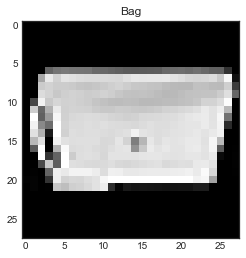

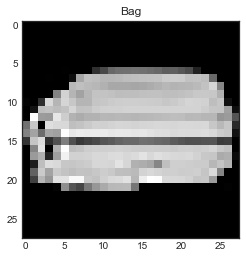

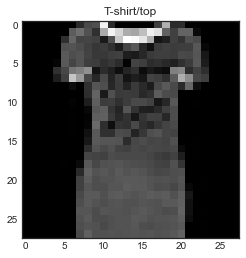

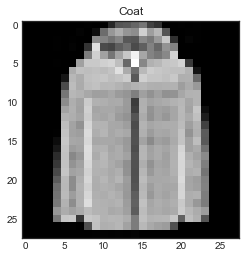

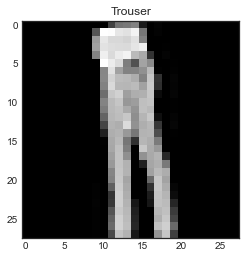

In [73]:
for image, label in train_ds.take(5):
    plt.title("{}".format(class_names[label[0]]))
    plt.imshow(image[0, :, :], cmap = 'gray')
    plt.show()

### 모델 생성
- 임의의 모델

In [77]:
def build_model():
    input = Input(shape = (28, 28), name = 'input')
    flatten = Flatten(input_shape = [28, 28], name = 'flatten')(input)
    hidden1 = Dense(256, kernel_initializer = 'he_normal', name = 'hidden1')(flatten)
    hidden1 = BatchNormalization()(hidden1)
    hidden1 = Activation('relu')(hidden1)
    dropout1 = Dropout(0.5)(hidden1)
    
    hidden2 = Dense(100, kernel_initializer = 'he_normal', name = 'hidden2')(dropout1)
    hidden2 = BatchNormalization()(hidden2)
    hidden2 = Activation('relu')(hidden2)
    dropout2 = Dropout(0.5)(hidden2)
    
    hidden3 = Dense(100, kernel_initializer = 'he_normal', name = 'hidden3')(dropout2)
    hidden3 = BatchNormalization()(hidden3)
    hidden3 = Activation('relu')(hidden3)
    dropout3 = Dropout(0.5)(hidden3)
    
    hidden4 = Dense(50, kernel_initializer = 'he_normal', name = 'hidden4')(dropout3)
    hidden4 = BatchNormalization()(hidden4)
    hidden4 = Activation('relu')(hidden4)
    dropout4 = Dropout(0.5)(hidden4)
    
    output = Dense(10, activation = 'softmax', name = 'output')(dropout4)
    
    model = Model(inputs = [input], outputs = output)
    
    return model

In [78]:
model = build_model()

In [79]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               2570

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [83]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [84]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalCrossentropy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalCrossentropy(name = 'test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


### 모델 학습 : 2번째 방법 (Keras)

5~6분 소요

### 모델 평가

### 결과 확인

### Test Batch Dataset